In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import set_option
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions
import seaborn as sns
from pandas.plotting import scatter_matrix

1. In this assignment you will perform exploratory data analysis on the Boston dataset.
2. The dataset has been provided on Canvas.
3. Load the dataset into a Pandas dataframe.
4. Clean the data (if needed).

In [43]:
filename = 'boston.csv'
data = read_csv(filename)
set_printoptions(precision=3)
data.head(5)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [36]:
# Check for missing values
print(data.isnull().sum())

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64


Nothing to clean 

5. The output in this data set is Medv (median price). The rest of the columns are
considered input. Separate the data into an input and output dataframes/Series. You
can ignore/eliminate categorical data.

In [37]:
# Split into input/output datasets (medv is output)
array = data.values
X1 = data.drop('medv', axis=1)
Y1 = data['medv']
X1names = X1.columns

6. Perform normalization and standardization on the data. We normally normalize and
standardize the input frame and keep the output intact.
7. Put the new normalized input data frame and the output into a new data frame called
data_norm. Do the same for standardized data. Call the new data frame for
standardized data as data_stand.

In [38]:
data_norm = X1.copy()
# Normalize
norm_scaler = Normalizer().fit(data_norm)
data_norm = norm_scaler.transform(data_norm)
# add output to normalized data
data_norm = pd.DataFrame(data_norm, columns=X1names)
data_norm['medv'] = Y1

data_stand = X1.copy()
# Standardize
stand_scaler = StandardScaler().fit(data_stand)
data_stand = stand_scaler.transform(data_stand)
# add output to standardized data
data_stand = pd.DataFrame(data_stand, columns=X1names)
data_stand['medv'] = Y1
data_objects = ((data_norm, 'data_norm'), (data_stand, 'data_stand'), (data, "data_raw"))

8. Perform basic EDA, i.e. descriptive stats, plot the histograms and match/verify with
descriptive stats.

In [47]:
# Descriptive stats
set_option('display.width', 100)
set_option('display.precision', 1)
for data, name in data_objects:
    print(f"Data: {name}")
    print(data.describe())

Data: data_norm
       Unnamed: 0     crim       zn    indus     chas      nox       rm      age      dis  \
count     5.1e+02  5.1e+02  5.1e+02  5.1e+02  5.1e+02  5.1e+02  5.1e+02  5.1e+02  5.1e+02   
mean      3.8e-01  4.5e-03  2.1e-02  1.7e-02  1.2e-04  9.0e-04  1.0e-02  1.1e-01  6.6e-03   
std       1.7e-01  1.0e-02  4.2e-02  1.0e-02  4.4e-04  2.0e-04  2.6e-03  4.7e-02  4.2e-03   
min       2.0e-03  1.3e-05  0.0e+00  8.9e-04  0.0e+00  5.8e-04  4.2e-03  6.4e-03  1.3e-03   
25%       2.2e-01  1.5e-04  0.0e+00  9.6e-03  0.0e+00  7.7e-04  8.0e-03  7.7e-02  3.0e-03   
50%       4.3e-01  4.5e-04  0.0e+00  1.7e-02  0.0e+00  8.8e-04  1.1e-02  1.1e-01  5.8e-03   
75%       5.2e-01  4.7e-03  2.5e-02  2.1e-02  0.0e+00  9.7e-04  1.2e-02  1.4e-01  9.3e-03   
max       7.2e-01  1.0e-01  2.1e-01  5.9e-02  2.2e-03  1.9e-03  1.6e-02  2.4e-01  2.2e-02   

           rad    tax  ptratio    black    lstat   medv  
count  5.1e+02  506.0  5.1e+02  5.1e+02  5.1e+02  506.0  
mean   1.3e-02    0.6  3.0e-02

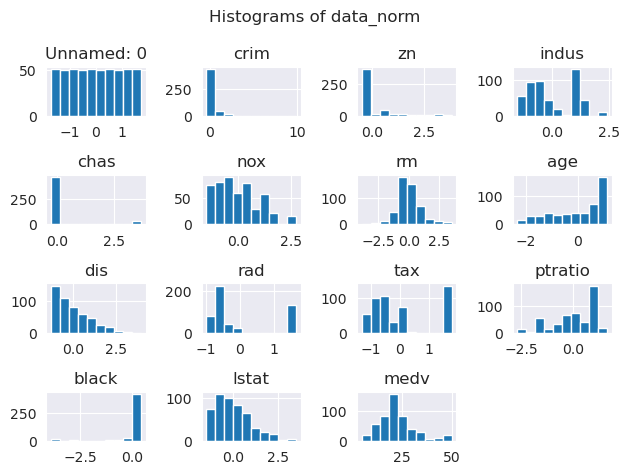

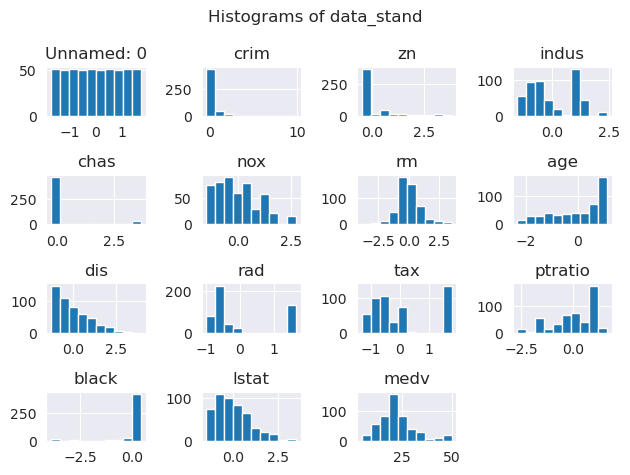

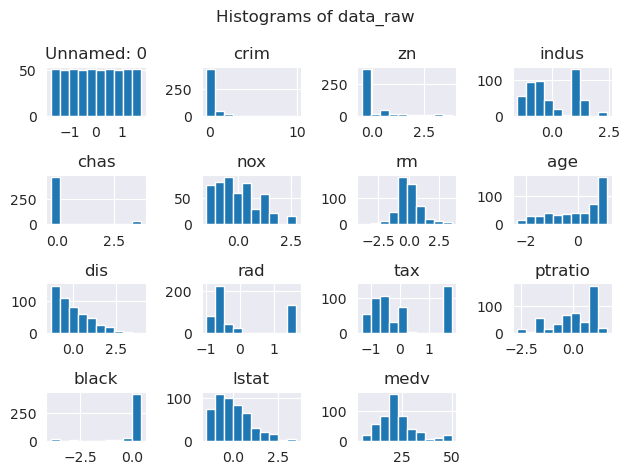

In [40]:
# Histograms
for data, name in data_objects:
    data_stand.hist()
    plt.suptitle(f"Histograms of {name}")
    plt.tight_layout()
    plt.show()

9. Continue with correlation analysis (calculate correlation and plot correlation heatmap) and scatter plots.

            Unnamed: 0      crim        zn     indus      chas       nox  \
Unnamed: 0    1.000000  0.223159  0.020666 -0.087857  0.048703 -0.438646   
crim          0.223159  1.000000 -0.206443  0.208104 -0.060410 -0.127003   
zn            0.020666 -0.206443  1.000000 -0.502052 -0.030869 -0.273017   
indus        -0.087857  0.208104 -0.502052  1.000000  0.093970  0.456182   
chas          0.048703 -0.060410 -0.030869  0.093970  1.000000  0.142864   
nox          -0.438646 -0.127003 -0.273017  0.456182  0.142864  1.000000   
rm           -0.476631 -0.494577  0.336761 -0.321484  0.084582  0.374072   
age          -0.324343  0.048279 -0.455637  0.468565  0.116894  0.650884   
dis          -0.304727 -0.425992  0.621818 -0.570474 -0.062704 -0.147816   
rad           0.358826  0.610779 -0.321152  0.224815 -0.033931 -0.279157   
tax          -0.008681  0.492745 -0.335888  0.464319 -0.062769 -0.018826   
ptratio      -0.632219 -0.380392  0.009288 -0.077892 -0.022852  0.368658   
black       

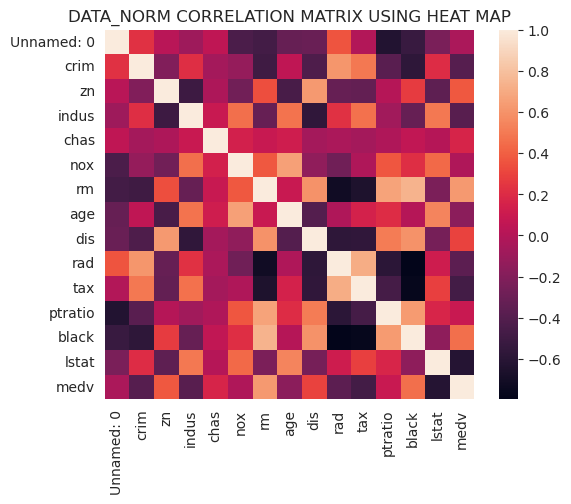

<Figure size 640x480 with 0 Axes>

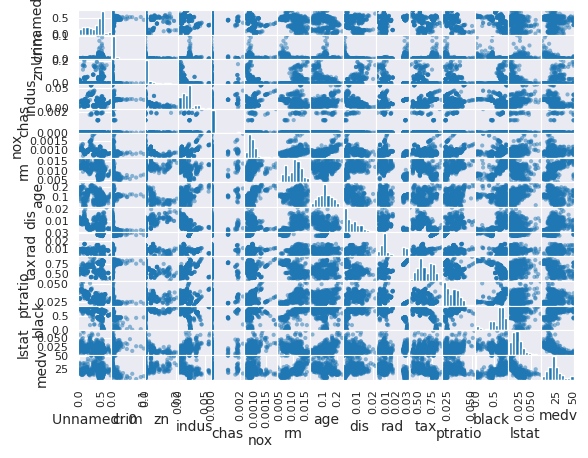

            Unnamed: 0      crim        zn     indus      chas       nox  \
Unnamed: 0    1.000000  0.223159  0.020666 -0.087857  0.048703 -0.438646   
crim          0.223159  1.000000 -0.206443  0.208104 -0.060410 -0.127003   
zn            0.020666 -0.206443  1.000000 -0.502052 -0.030869 -0.273017   
indus        -0.087857  0.208104 -0.502052  1.000000  0.093970  0.456182   
chas          0.048703 -0.060410 -0.030869  0.093970  1.000000  0.142864   
nox          -0.438646 -0.127003 -0.273017  0.456182  0.142864  1.000000   
rm           -0.476631 -0.494577  0.336761 -0.321484  0.084582  0.374072   
age          -0.324343  0.048279 -0.455637  0.468565  0.116894  0.650884   
dis          -0.304727 -0.425992  0.621818 -0.570474 -0.062704 -0.147816   
rad           0.358826  0.610779 -0.321152  0.224815 -0.033931 -0.279157   
tax          -0.008681  0.492745 -0.335888  0.464319 -0.062769 -0.018826   
ptratio      -0.632219 -0.380392  0.009288 -0.077892 -0.022852  0.368658   
black       

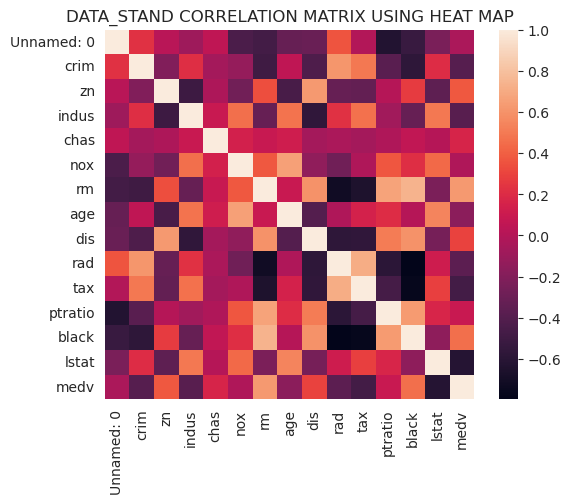

<Figure size 640x480 with 0 Axes>

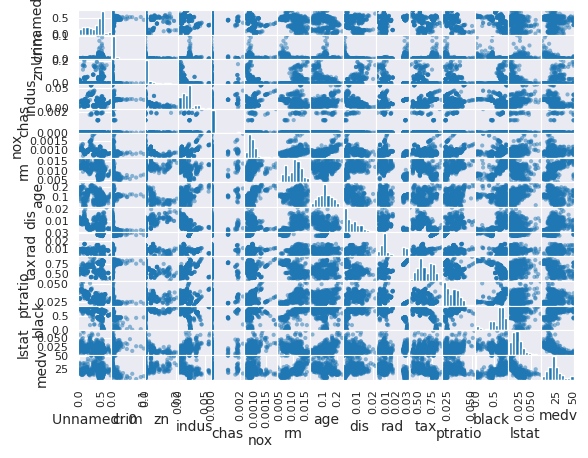

            Unnamed: 0      crim        zn     indus      chas       nox  \
Unnamed: 0    1.000000  0.223159  0.020666 -0.087857  0.048703 -0.438646   
crim          0.223159  1.000000 -0.206443  0.208104 -0.060410 -0.127003   
zn            0.020666 -0.206443  1.000000 -0.502052 -0.030869 -0.273017   
indus        -0.087857  0.208104 -0.502052  1.000000  0.093970  0.456182   
chas          0.048703 -0.060410 -0.030869  0.093970  1.000000  0.142864   
nox          -0.438646 -0.127003 -0.273017  0.456182  0.142864  1.000000   
rm           -0.476631 -0.494577  0.336761 -0.321484  0.084582  0.374072   
age          -0.324343  0.048279 -0.455637  0.468565  0.116894  0.650884   
dis          -0.304727 -0.425992  0.621818 -0.570474 -0.062704 -0.147816   
rad           0.358826  0.610779 -0.321152  0.224815 -0.033931 -0.279157   
tax          -0.008681  0.492745 -0.335888  0.464319 -0.062769 -0.018826   
ptratio      -0.632219 -0.380392  0.009288 -0.077892 -0.022852  0.368658   
black       

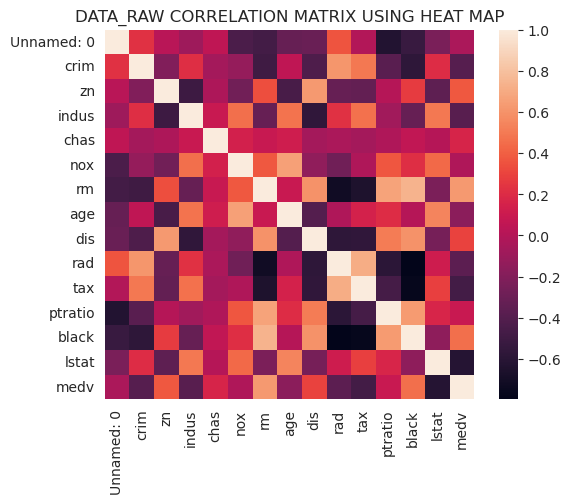

<Figure size 640x480 with 0 Axes>

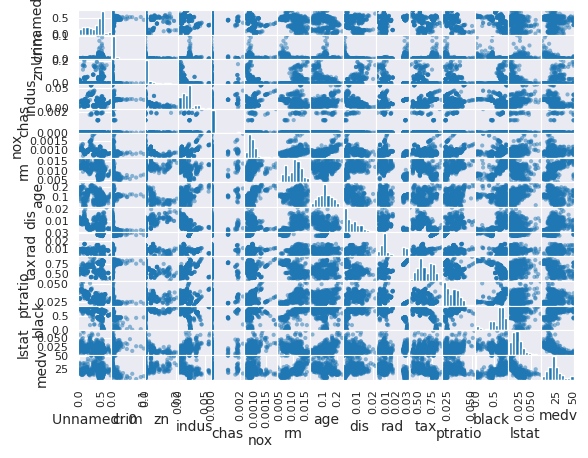

In [41]:
for data, name in data_objects:
    plt.figure() # new plot
    corMat = data_norm.corr(method='pearson')
    print(corMat)
    ## plot correlation matrix as a heat map
    sns.heatmap(corMat, square=True)
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)
    variable_name = f'{name}'.split('=')[0]
    plt.title(f"{variable_name.upper()} CORRELATION MATRIX USING HEAT MAP")
    plt.show()
    
    ## scatter plot of all data
    plt.figure()
    scatter_matrix(data_norm)
    plt.show()

11. Identify the high correlation columns from the headmap and compare the results from
those of the scatter plots. Do the results match? Explain.